In [40]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import os
import pandas as pd
import xlrd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Creates a list of municipalities to extract data from map.

In [200]:
def municipios_func():
    municipios = pd.read_csv('/Users/samielzengotita/Documents/IRONHACK/PROYECT/Real_Estate/PR_Municipios')
    municipios = municipios.values.tolist()
    flat_list = []
    for row in municipios:
        flat_list.extend(row)
    flat_list.remove('Moca')
    #flat_list.remove('Toa Baja')
    muni_pr = []
    for municipio in flat_list:
        muni_pr.append(municipio + ', PR')
    return muni_pr

# Webscraping - Gathering data from map website

In [201]:
def download_data(municipio):
    
    site_input = driver.find_element(By.CSS_SELECTOR,'#searchField')
    site_input.clear()
    site_input.send_keys(municipio)
    button = driver.find_element(By.CSS_SELECTOR,'#searchButton')
    button.click()
    time.sleep(2)
    i = 1
    while True:
        cdbg = driver.find_element(By.CSS_SELECTOR,f'#listOfGranteesFound > option:nth-child({i})')
        if 'CDBG' not in cdbg.text:
            i+=1
            time.sleep(2)
        else:
            break
    cdbg.click()
    finish = driver.find_element(By.CSS_SELECTOR,'#idChooseGranteeFinishBtn')
    finish.click()
    time.sleep(2)
    export = driver.find_element(By.CSS_SELECTOR,'#exportBtn')
    export.click()
    

# Cleans excel files to create the first dataframe, which is CDBG data.

In [216]:
def clean_excel_df1(file):
    df_excel_1 = pd.read_excel((file), skiprows=[0,1,2,3,4,5,6,7])
    df_excel_1.columns = df_excel_1.columns.fillna('type')
    df_excel_1.rename(columns={"type": "2018"}, inplace=True)
    df_excel_1.rename(columns={"nan.1": "2019"}, inplace=True)
    df_excel_1.rename(columns={"nan.2": "2020"}, inplace=True)
    df_excel_1.rename(columns={"nan.3": "2021"}, inplace=True)
    
    df_excel_1 = df_excel_1.drop('Unnamed: 1', axis=1)
    df_excel_1 = df_excel_1.drop('Unnamed: 2', axis=1)
    cleaned_excel_cdbg = df_excel_1.iloc[:1,:]
    return cleaned_excel_cdbg

# Cleans excel files to create the first dataframe, which is the grantees data.

In [229]:
def clean_excel_df2(file):
    df_excel_2 = pd.read_excel((file), skiprows=[0,1,2,3,4,5,6,7])
    df_excel_2.columns = df_excel_2.columns.fillna('type')
    df_excel_2.rename(columns={"type": "2018"}, inplace=True)
    df_excel_2.rename(columns={"nan.1": "2019"}, inplace=True)
    df_excel_2.rename(columns={"nan.2": "2020"}, inplace=True)
    df_excel_2.rename(columns={"nan.3": "2021"}, inplace=True)
    
    df_excel_2 = df_excel_2.drop('Unnamed: 1', axis=1)
    df_excel_2 = df_excel_2.drop('Unnamed: 2', axis=1)
    cleaned_excel_grantee = df_excel_2.iloc[7:28,:]
    
    cleaned_excel_grantee.reset_index(drop=True, inplace=True)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==4].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==5].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==11].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==12].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==13].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==14].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==15].index)
    cleaned_excel_grantee.reset_index(drop=True, inplace=True)
    cleaned_excel_grantee.rename(columns={2022: "Amount"}, inplace=True)
    return cleaned_excel_grantee

In [224]:
def clean_excel_df2(file):
    df_excel_2 = pd.read_excel((file), skiprows=[0,1,2,3,4,5,6,7])
    df_excel_2.columns = df_excel_2.columns.fillna('type')
    df_excel_2.rename(columns={"type": "2018"}, inplace=True)
    df_excel_2.rename(columns={"nan.1": "2019"}, inplace=True)
    df_excel_2.rename(columns={"nan.2": "2020"}, inplace=True)
    df_excel_2.rename(columns={"nan.3": "2021"}, inplace=True)
    
    df_excel_2 = df_excel_2.drop('Unnamed: 1', axis=1)
    df_excel_2 = df_excel_2.drop('Unnamed: 2', axis=1)
    cleaned_excel_grantee = df_excel_2.iloc[7:28,:]
    
    cleaned_excel_grantee.reset_index(drop=True, inplace=True)
    cleaned_excel_grantee = df2.drop('2018', axis=1)
    cleaned_excel_grantee = df2.drop('2019', axis=1)
    cleaned_excel_grantee = df2.drop('2020', axis=1)
    cleaned_excel_grantee = df2.drop('2021', axis=1)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==4].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==5].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==11].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==12].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==13].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==14].index)
    cleaned_excel_grantee = df2.drop(cleaned_excel_grantee.loc[cleaned_excel_grantee.index==15].index)
    cleaned_excel_grantee.reset_index(drop=True, inplace=True)
    cleaned_excel_grantee.rename(columns={2022: "Amount"}, inplace=True)
    return cleaned_excel_grantee

# Gives a dictionary with 26 datasets for each municipality, with CDBG data

In [221]:
cdbg_dict = {}
def cdbg_data():

    dirname = '/Users/samielzengotita/Documents/IRONHACK/PROYECT/Real_Estate/EXCEL FILES'
    ext = ('.xlsx')
    

    
    for file in os.scandir(dirname):
        if file.path.endswith(ext):
            municipality_name = os.path.splitext(file.name)[0]  # Extracting the municipality name from the file name
            df_cdbg_data = clean_excel_df1(file)
            cdbg_dict[municipality_name] = df_cdbg_data
    
    # Now df_dict contains 26 DataFrames, each with a unique title (municipality name)
    # You can access each DataFrame using df_dict['municipality_name']

# Gives a dictionary with 26 datasets for each municipality, with grantee data

In [225]:
grant_dict = {}
def grant_data():

    dirname = '/Users/samielzengotita/Documents/IRONHACK/PROYECT/Real_Estate/EXCEL FILES'
    ext = ('.xlsx')
    
    for file in os.scandir(dirname):
        if file.path.endswith(ext):
            municipality_name = os.path.splitext(file.name)[0]  # Extracting the municipality name from the file name
            df_grant_data = clean_excel_df2(file)
            grant_dict[municipality_name] = df_grant_data
    
    # Now df_dict contains 26 DataFrames, each with a unique title (municipality name)
    # You can access each DataFrame using df_dict['municipality_name']

# Returns a list where you can copy the municipality to call upon any of the 26 datasets created.

In [206]:
def muni_copy():

    muni_copy_list = []
    for key,value in df_dict.items():
        muni_copy.append(key)
    muni_copy_list

# Webscraping - Gathers mortgage data.

In [207]:
def get_fha_snapshots(): 
    i = 5
    while i == 5:
        for j in range(1,13):
            site_input = driver.find_element(By.CSS_SELECTOR,f'#block-system-main > div > div:nth-child(1) > div > div > div > div > div > div > div > div > div.genlink > ul:nth-child({i}) > li:nth-child({j}) > a')
            site_input.click()
            time.sleep(2)
        i = 7
    else:
        for j in range(1,49):
            site_input = driver.find_element(By.CSS_SELECTOR,f'#block-system-main > div > div:nth-child(1) > div > div > div > div > div > div > div > div > div.genlink > ul:nth-child({i}) > li:nth-child({j}) > a')
            site_input.click()
            time.sleep(2)

# Cleans names of mortgage data excel files.

In [199]:
def rename_fha_snapshots():
    
    dirname = '/Users/samielzengotita/Documents/IRONHACK/PROYECT/Real_Estate/FHA SNAPSHOTS'
    
    for file in os.scandir(dirname):
        if file.name.startswith('FHA_SFSnapshot_'):
            os.rename(f'{file.path}', f"{file.path.replace('FHA_SFSnapshot_','')}")
            
    for file in os.scandir(dirname):
        if file.name.startswith('FHA_SFSnapshot Forward_'):
            os.rename(f'{file.path}', f"{file.path.replace('FHA_SFSnapshot Forward_','')}")
            
    for file in os.scandir(dirname):
        if file.name.startswith('FHA_SFSnapshotForward_'):
            os.rename(f'{file.path}', f"{file.path.replace('FHA_SFSnapshotForward_','')}")
            
    for file in os.scandir(dirname):
        if file.name.startswith('FHA_Snapshot_'):
            os.rename(f'{file.path}', f"{file.path.replace('FHA_Snapshot_','')}")
            
    for file in os.scandir(dirname):
        if file.name.startswith('FHASFSnapshotForward_'):
            os.rename(f'{file.path}', f"{file.path.replace('FHASFSnapshotForward_','')}")
            
    for file in os.scandir(dirname):
        if file.name.startswith('FHASFSnapshot_'):
            os.rename(f'{file.path}', f"{file.path.replace('FHASFSnapshot_','')}")
    
    for file in os.scandir(dirname):
        if file.name.endswith('_New.xlsx'):
            os.rename(f'{file.path}', f"{file.path.replace('_New','')}")
    
    for file in os.scandir(dirname):
        if file.name.endswith('..xlsx'):
            os.rename(f'{file.path}', f"{file.path.replace('..xlsx','.xlsx')}")

# Returns interest rate average for each year (2018-2022) and average for mortgage amount.

In [170]:
interest_rate_avg = {}
original_mortgage_amount_avg = {}

def mortgage_avg():

    directory_path = '/Users/samielzengotita/Documents/IRONHACK/PROYECT/Real_Estate/FHA SNAPSHOTS'
    
    
    # Loop through each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".xlsx"):  
            
            year = filename[-9:-5]
            
            
            df = pd.read_excel(os.path.join(directory_path, filename), sheet_name=2)  
            
            
            df['Interest Rate'] = pd.to_numeric(df['Interest Rate'], errors='coerce')
            df['Original Mortgage Amount'] = pd.to_numeric(df['Original Mortgage Amount'], errors='coerce')
            
            
            df = df.iloc[1:]
            
            
            if year not in interest_rate_avg:
                interest_rate_avg[year] = []
            interest_rate_avg[year].append(df['Interest Rate'].mean())
            
            if year not in original_mortgage_amount_avg:
                original_mortgage_amount_avg[year] = []
            original_mortgage_amount_avg[year].append(df['Original Mortgage Amount'].mean())
    
    
    interest_rate_df = pd.DataFrame([(year, sum(avg_list) / len(avg_list)) for year, avg_list in interest_rate_avg.items()], columns=['Year', 'Interest Rate Average'])
    original_mortgage_amount_df = pd.DataFrame([(year, sum(avg_list) / len(avg_list)) for year, avg_list in original_mortgage_amount_avg.items()], columns=['Year', 'Original Mortgage Amount Average'])
    
    
    print(interest_rate_df)
    print(original_mortgage_amount_df)

   Year  Interest Rate Average
0  2018               4.761655
1  2020               3.428575
2  2022               4.813071
3  2021               3.106356
4  2019               4.469297
   Year  Original Mortgage Amount Average
0  2018                     208301.660673
1  2020                     233863.245727
2  2022                     279608.412571
3  2021                     253369.659493
4  2019                     217821.891821


# AUTOMATING CODE <3

In [62]:
# options = webdriver.ChromeOptions()
# prefs = {
#     "download.default_directory": "/Users/samielzengotita/Documents/IRONHACK/PROYECT/Real_Estate/EXCEL FILES",
#     "download.directory_upgrade": True,
#     "download.prompt_for_download": False,
# }
# options.add_experimental_option("prefs", prefs)
# 
# driver = webdriver.Chrome(options=options)
# driver.get('https://egis.hud.gov/cpdmaps/')
#     
# list(map(download_data, municipios_func()))

KeyError: "['2018'] not found in axis"

In [234]:
cdbg_data()
grant_data()

In [121]:
# options = webdriver.ChromeOptions()
# prefs = {
#     "download.default_directory": '/Users/samielzengotita/Documents/IRONHACK/PROYECT/Real_Estate/FHA SNAPSHOTS',
#     "download.directory_upgrade": True,
#     "download.prompt_for_download": False,
# }
# options.add_experimental_option("prefs", prefs)
# 
# driver = webdriver.Chrome(options=options)
# driver.get('https://www.hud.gov/program_offices/housing/rmra/oe/rpts/sfsnap/sfsnap')
#     
# get_fha_snapshots()

In [ ]:
rename_fha_snapshots()

In [171]:
interest_rate_df

,Year,Interest Rate Average
0,2018,4.761655
1,2020,3.428575
2,2022,4.813071
3,2021,3.106356
4,2019,4.469297


In [172]:
original_mortgage_amount_df

,Year,Original Mortgage Amount Average
0,2018,208301.660673
1,2020,233863.245727
2,2022,279608.412571
3,2021,253369.659493
4,2019,217821.891821


In [173]:
sorted_interest = interest_rate_df.sort_values(by='Year')
sorted_interest

,Year,Interest Rate Average
0,2018,4.761655
4,2019,4.469297
1,2020,3.428575
3,2021,3.106356
2,2022,4.813071


In [174]:
sorted_mortgage = original_mortgage_amount_df.sort_values(by='Year')
sorted_mortgage

,Year,Original Mortgage Amount Average
0,2018,208301.660673
4,2019,217821.891821
1,2020,233863.245727
3,2021,253369.659493
2,2022,279608.412571


# Adding Natalie's Code

In [2]:
import requests
import json
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)
from dotenv import load_dotenv
import os

In [3]:
url = 'https://www.huduser.gov/hudapi/public/fmr/listCounties/PR'

In [4]:
dotenv_path = '/Users/natalielewis/Desktop/Ironhack/Projects/Real_Estate/api_key.env'

In [5]:
load_dotenv(dotenv_path)

True

In [6]:
api_key = os.getenv("HUD_API_KEY")

In [7]:
headers = {"Authorization": f"Bearer {api_key}"}

In [8]:
result = requests.get(url,headers=headers)
data = result.json()

In [9]:
pd.DataFrame(data)

,state_code,fips_code,county_name,town_name,category
0,PR,7200199999,Adjuntas Municipio,,County
1,PR,7200399999,Aguada Municipio,,County
2,PR,7200599999,Aguadilla Municipio,,County
3,PR,7200799999,Aguas Buenas Municipio,,County
4,PR,7200999999,Aibonito Municipio,,County
5,PR,7201199999,Añasco Municipio,,County
6,PR,7201399999,Arecibo Municipio,,County
7,PR,7201599999,Arroyo Municipio,,County
8,PR,7201799999,Barceloneta Municipio,,County
9,PR,7201999999,Barranquitas Municipio,,County


In [10]:
counties_to_keep = [
    'Aguadilla Municipio',
    'Arecibo Municipio',
    'Bayamón Municipio',
    'Cabo Rojo Municipio',
    'Caguas Municipio',
    'Canóvanas Municipio',
    'Carolina Municipio',
    'Cayey Municipio',
    'Cidra Municipio',
    'Fajardo Municipio',
    'Guayama Municipio',
    'Guaynabo Municipio',
    'Humacao Municipio',
    'Isabela Municipio',
    'Juana Díaz Municipio',
    'Manatí Municipio',
    'Mayagüez Municipio',
    'Ponce Municipio',
    'Río Grande Municipio',
    'San Germán Municipio',
    'San Juan Municipio',
    'San Sebastián Municipio',
    'Toa Alta Municipio',
    'Toa Baja Municipio',
    'Trujillo Alto Municipio',
    'Vega Baja Municipio',
]

In [11]:
len(counties_to_keep)

26

In [12]:
clean_county = {entry['county_name']: entry['fips_code'] for entry in data}

In [13]:
# Create a new dictionary with 26 counties
cleaned_dict = {}

for key, value in clean_county.items():
    if key in counties_to_keep:
        cleaned_dict[key] = value

In [14]:
len(cleaned_dict)

26

In [15]:
cleaned_dict

{'Aguadilla Municipio': '7200599999',
 'Arecibo Municipio': '7201399999',
 'Bayamón Municipio': '7202199999',
 'Cabo Rojo Municipio': '7202399999',
 'Caguas Municipio': '7202599999',
 'Canóvanas Municipio': '7202999999',
 'Carolina Municipio': '7203199999',
 'Cayey Municipio': '7203599999',
 'Cidra Municipio': '7204199999',
 'Fajardo Municipio': '7205399999',
 'Guayama Municipio': '7205799999',
 'Guaynabo Municipio': '7206199999',
 'Humacao Municipio': '7206999999',
 'Isabela Municipio': '7207199999',
 'Juana Díaz Municipio': '7207599999',
 'Manatí Municipio': '7209199999',
 'Mayagüez Municipio': '7209799999',
 'Ponce Municipio': '7211399999',
 'Río Grande Municipio': '7211999999',
 'San Germán Municipio': '7212599999',
 'San Juan Municipio': '7212799999',
 'San Sebastián Municipio': '7213199999',
 'Toa Alta Municipio': '7213599999',
 'Toa Baja Municipio': '7213799999',
 'Trujillo Alto Municipio': '7213999999',
 'Vega Baja Municipio': '7214599999'}

# Automating the API process

In [16]:
results = []
def api_request():
    base_url = 'https://www.huduser.gov/hudapi/public/il/data/'
    
    #loop to iterate through the FIPS codes
    for key, value in cleaned_dict.items():
        url = f"{base_url}{value}"
        result = requests.get(url,headers=headers)
        result = result.json()
        results.append(result)
    return results

In [17]:
county_api = api_request()

# Changing dict to dataframe

In [18]:
pd.options.display.max_columns = 50

In [19]:
norm_counties = pd.json_normalize(county_api)

In [20]:
il_series = norm_counties.select_dtypes('number').mean()

In [21]:
extremelylow = [column for column in norm_counties.columns if 'extremely_low' in column]

In [22]:
norm_counties['extremelylow_avg']= norm_counties[extremelylow].mean(axis=1)

In [23]:
verylow = [column for column in norm_counties.columns if 'very_low' in column]

In [24]:
norm_counties['verylow_avg']= norm_counties[verylow].mean(axis=1)

In [25]:
low = [column for column in norm_counties.columns if '.low' in column]

In [26]:
norm_counties['low_avg']= norm_counties[low].mean(axis=1)

In [27]:
norm_counties

,data.county_name,data.counties_msa,data.town_name,data.metro_status,data.metro_name,data.area_name,data.year,data.median_income,data.very_low.il50_p1,data.very_low.il50_p2,data.very_low.il50_p3,data.very_low.il50_p4,data.very_low.il50_p5,data.very_low.il50_p6,data.very_low.il50_p7,data.very_low.il50_p8,data.extremely_low.il30_p1,data.extremely_low.il30_p2,data.extremely_low.il30_p3,data.extremely_low.il30_p4,data.extremely_low.il30_p5,data.extremely_low.il30_p6,data.extremely_low.il30_p7,data.extremely_low.il30_p8,data.low.il80_p1,data.low.il80_p2,data.low.il80_p3,data.low.il80_p4,data.low.il80_p5,data.low.il80_p6,data.low.il80_p7,data.low.il80_p8,extremelylow_avg,verylow_avg,low_avg
0,"Aguadilla Municipio, PR",,,1,"Aguadilla-Isabela, PR","Aguadilla-Isabela, PR MSA",2023,26900,9950,11350,12750,14150,15300,16450,17550,18700,5950,6800,7650,8500,9200,9900,10550,11250,15900,18150,20400,22650,24500,26300,28100,29900,8725.00,14525.00,23237.50
1,"Arecibo Municipio, PR",,,1,"Arecibo, PR","Arecibo, PR MSA",2023,28000,10000,11400,12850,14250,15400,16550,17700,18850,6000,6850,7700,8550,9250,9950,10650,11300,16000,18250,20550,22800,24650,26450,28300,30100,8781.25,14625.00,23387.50
2,"Bayamón Municipio, PR",,,1,"San Juan-Bayamón-Caguas, PR","San Juan-Guaynabo, PR HUD Metro FMR Area",2023,34900,11800,13450,15150,16800,18150,19500,20850,22200,7100,8100,9100,10100,10950,11750,12550,13350,18850,21550,24250,26900,29100,31250,33400,35550,10375.00,17237.50,27606.25
3,"Cabo Rojo Municipio, PR",,,1,"San Germán, PR","San German, PR MSA",2023,26900,9450,10800,12150,13500,14600,15700,16750,17850,5700,6500,7300,8100,8750,9400,10050,10700,15150,17300,19450,21600,23350,25100,26800,28550,8312.50,13850.00,22162.50
4,"Caguas Municipio, PR",,,1,"San Juan-Bayamón-Caguas, PR","Caguas, PR HUD Metro FMR Area",2023,34400,12050,13800,15500,17200,18600,20000,21350,22750,7250,8250,9300,10300,11150,11950,12800,13600,19250,22000,24750,27500,29700,31900,34100,36300,10575.00,17656.25,28187.50
5,"Canóvanas Municipio, PR",,,1,"San Juan-Bayamón-Caguas, PR","San Juan-Guaynabo, PR HUD Metro FMR Area",2023,34900,11800,13450,15150,16800,18150,19500,20850,22200,7100,8100,9100,10100,10950,11750,12550,13350,18850,21550,24250,26900,29100,31250,33400,35550,10375.00,17237.50,27606.25
6,"Carolina Municipio, PR",,,1,"San Juan-Bayamón-Caguas, PR","San Juan-Guaynabo, PR HUD Metro FMR Area",2023,34900,11800,13450,15150,16800,18150,19500,20850,22200,7100,8100,9100,10100,10950,11750,12550,13350,18850,21550,24250,26900,29100,31250,33400,35550,10375.00,17237.50,27606.25
7,"Cayey Municipio, PR",,,1,"San Juan-Bayamón-Caguas, PR","Caguas, PR HUD Metro FMR Area",2023,34400,12050,13800,15500,17200,18600,20000,21350,22750,7250,8250,9300,10300,11150,11950,12800,13600,19250,22000,24750,27500,29700,31900,34100,36300,10575.00,17656.25,28187.50
8,"Cidra Municipio, PR",,,1,"San Juan-Bayamón-Caguas, PR","Caguas, PR HUD Metro FMR Area",2023,34400,12050,13800,15500,17200,18600,20000,21350,22750,7250,8250,9300,10300,11150,11950,12800,13600,19250,22000,24750,27500,29700,31900,34100,36300,10575.00,17656.25,28187.50
9,"Fajardo Municipio, PR",,,1,"San Juan-Bayamón-Caguas, PR","Fajardo, PR HUD Metro FMR Area",2023,29200,11000,12550,14100,15650,16950,18200,19450,20700,6600,7550,8500,9400,10200,10950,11700,12450,17550,20050,22550,25050,27100,29100,31100,33100,9668.75,16075.00,25700.00


In [28]:
melted_df = pd.melt(norm_counties, id_vars=['data.county_name'],
                    value_vars=['extremelylow_avg', 'verylow_avg', 'low_avg'],
                    var_name='Income Category', value_name='Average')

In [29]:
melted_df

,data.county_name,Income Category,Average
0,"Aguadilla Municipio, PR",extremelylow_avg,8725.00
1,"Arecibo Municipio, PR",extremelylow_avg,8781.25
2,"Bayamón Municipio, PR",extremelylow_avg,10375.00
3,"Cabo Rojo Municipio, PR",extremelylow_avg,8312.50
4,"Caguas Municipio, PR",extremelylow_avg,10575.00
5,"Canóvanas Municipio, PR",extremelylow_avg,10375.00
6,"Carolina Municipio, PR",extremelylow_avg,10375.00
7,"Cayey Municipio, PR",extremelylow_avg,10575.00
8,"Cidra Municipio, PR",extremelylow_avg,10575.00
9,"Fajardo Municipio, PR",extremelylow_avg,9668.75


In [30]:
pivot_table = melted_df.pivot_table(index='data.county_name',
                                    columns='Income Category',
                                    values='Average', aggfunc='mean')

In [31]:
pivot_table

Income Category,extremelylow_avg,low_avg,verylow_avg
data.county_name,,,
"Aguadilla Municipio, PR",8725.00,23237.50,14525.00
"Arecibo Municipio, PR",8781.25,23387.50,14625.00
"Bayamón Municipio, PR",10375.00,27606.25,17237.50
"Cabo Rojo Municipio, PR",8312.50,22162.50,13850.00
"Caguas Municipio, PR",10575.00,28187.50,17656.25
"Canóvanas Municipio, PR",10375.00,27606.25,17237.50
"Carolina Municipio, PR",10375.00,27606.25,17237.50
"Cayey Municipio, PR",10575.00,28187.50,17656.25
"Cidra Municipio, PR",10575.00,28187.50,17656.25


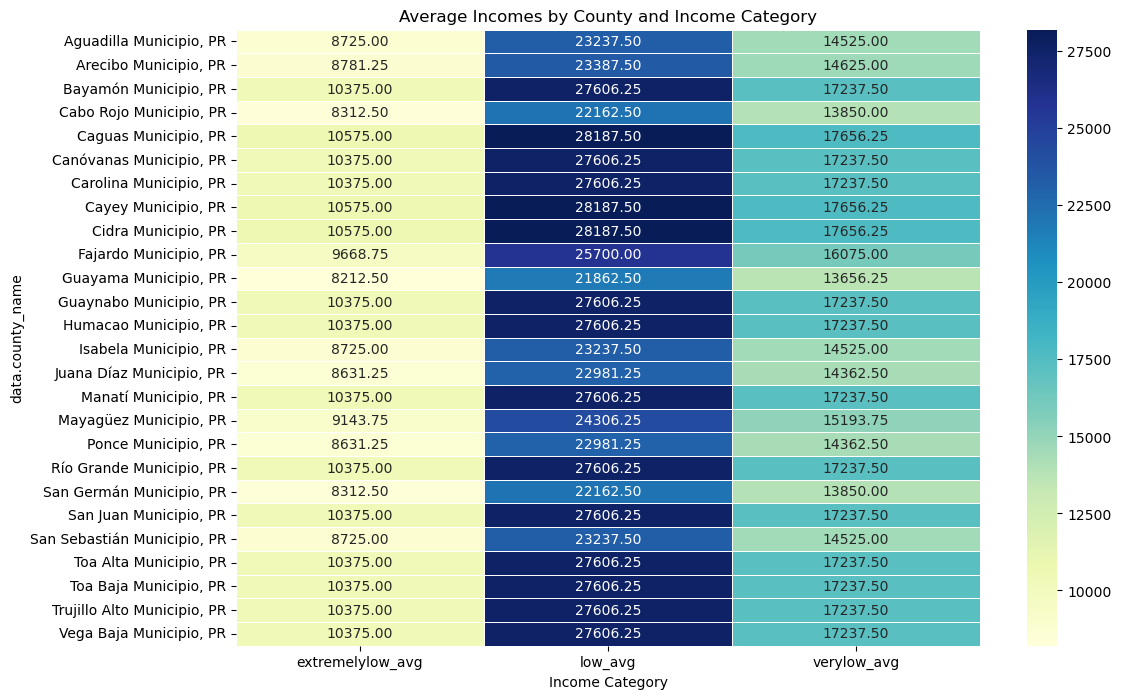

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Average Incomes by County and Income Category')
plt.show()